<a href="https://colab.research.google.com/github/iamakshatjain/ego-Facebook/blob/master/SNA_fb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SNA ROUND 1 Project

Team : N-alysts

* Akshat Jain - 17ucc011
* Abhimanyu Gupta - 17ucs005
* Mohit Agrawal - 17dcs007

Guided by: Dr. Sakthi Balan, Associate Professor in Computer Science & Engineering Department at The LNM Institute of Information Technology

#Data set Description

Dataset Name : ego-Facebook
Reference Link : https://snap.stanford.edu/data/ego-Facebook.html

Here we are using facebook dataset which have undirected graph between nodes and edges and each node represent a particular user and each edge representing, there is a friendship between that nodes(users).

#General information about the graph 

In [2]:
import networkx as nx

#reading graph from list of edges
G=nx.read_edgelist('facebook.txt',nodetype=int,create_using=nx.DiGraph())

print(" ")

#general information about the graph
print (nx.info(G))

 
Name: 
Type: DiGraph
Number of nodes: 4039
Number of edges: 88234
Average in degree:  21.8455
Average out degree:  21.8455


**Basic description of graph**

Here the Number of nodes are 996 and Number of edges are 701 

Average in degree and Average out degree is same because the graph is undirected.

#Graph Visualization

Here the nodes are represented in green color and edges are represented with blue color.

Below is the graph produced after sampling the original data.



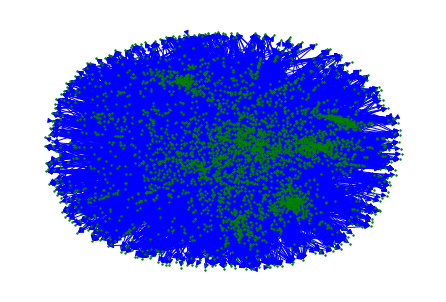

In [13]:
import matplotlib.pyplot as plt

# drawing graph
nx.draw(G, pos=None, node_color='g', edge_color='b',node_size=2)
plt.show()

#Average local clustering coefficient

The clustering coefficient, when applied to a single node, is a measure of how complete the neighborhood of a node is. When applied to an entire network, it is the average clustering coefficient over all of the nodes in the network.

In [3]:
print(nx.average_clustering(G))

print("\n")
print("Some of the clustering coefficients : ")
print("Node\tclustering coeff")
dict_c = nx.clustering(G)
w=1
for r in dict_c:
    if(w <= 5):
        w=w+1
        print(str(r)+"\t"+str(dict_c[r]))


0.3027733593100438


Some of the clustering coefficients : 
Node	clustering coeff
0	0.020980826572937317
1	0.20955882352941177
2	0.4444444444444444
3	0.3161764705882353
4	0.43333333333333335


Since the value of the average clustering coefficient is very less, this means that the chances of a connected neighbourhood is very less in the given data.

#Global clustering coefficient

The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed).

In [4]:
print(nx.transitivity(G))

0.2027449891358539


Here the global and local clustering coefficient has very small value so there are very less number of triadiac closures in our data i.e, if a person A is having two friends B and C then possibility of B and C being friends is too less.

Also this follows the theory that, the global and the average local clustering coefficients are not equal

#Reciprocity

It is the likelihood of the existence of mutual links between the nodes of the network

In [15]:
print(nx.reciprocity(G))

1.0


Here since the data is undirected i.e all the links are mutual, the reciprocity value is 1

#Transitivity

If refers to the extent to which the relation that relates two nodes in a network that are connected by an edge is transitive. 

i.e, what is the probablility that if A is friend of B and B is friend of C then, A is friend of C

In [6]:
print(nx.transitivity(G))

0.2027449891358539


Here, the above value of transitivity shows that there are very less number of transitive relations in the network

#Degree Centrality Distribution

In graph theory, the degree (or valency) of a vertex of a graph is the number of edges incident to the vertex

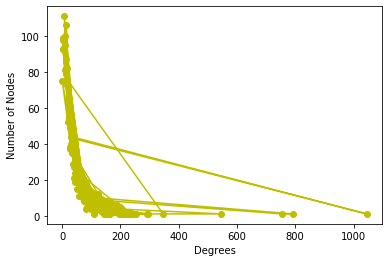

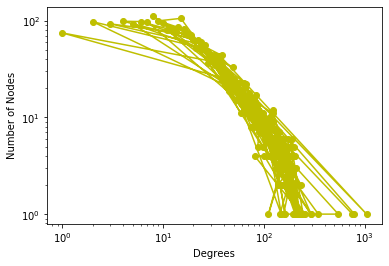

In [14]:
d={}
for x,y in nx.degree(G):
    if y not in d:
        d[y]=1
    else:
        d[y]+=1

plt.plot(list(d.keys()),list(d.values()),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.show()

#Log-Log graph
plt.loglog(list(d.keys()),list(d.values()),'yo-')
plt.xlabel("Degrees")
plt.ylabel("Number of Nodes")
plt.show()

Here the nodes which have high degree are low in number and nodes which have low degree are high in number, thus facebook network is following the pareto principle. 

And we expect this because we are using a social network






In [8]:
dict1=G.degree()
print("The node with maximum degree is :")
i = max(nx.degree_centrality(G),key=(nx.degree_centrality(G)).get)

val=dict1[i]
for p,r in dict1:
    if (r==val):
        print (str(p),str(r))

print("\n")   
print("Node    Degree Centrality")

dict_sorted_keys = sorted(nx.degree_centrality(G), key=(nx.degree_centrality(G)).get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w <= 5):
        w=w+1
        print(str(r)+"\t"+str(dict1[r]))

The node with maximum degree is :
107 1045


Node    Degree Centrality
107	1045
1684	792
1912	755
3437	547
0	347


Here the node with highest degree is 107

It means they have the maximum number of friends in the network i.e, 1045

Node 107 is the most popular and is expected to contain the maximum amount of information

#Eigen Vector Centrality

Eigenvector centrality computes the centrality for a node based on the centrality of its neighbors. 

The eigenvector centrality for node i is Ax = λx where A is the adjacency matrix of the graph G with eigenvalue λ.

In [9]:
dict =nx.eigenvector_centrality(G, max_iter = 10000)
i= max(nx.eigenvector_centrality(G, max_iter = 10000),key=(nx.eigenvector_centrality(G, max_iter = 10000)).get)
print("Node with maximum Eigenvector Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Eigenvector Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Eigenvector Centrality : 
2655 0.802704299670652


Node    Eigenvector Centrality
2655	0.802704299670652
2654	0.47986846225069085
2646	0.22755258082041144
2638	0.17819686548554586
2631	0.1669318256988354


The Eigen vector centrality for node 2655 is most.
So according to the eigen vector centrality, 2655 is most influential node here.




#Katz Centrality

A problem with eigen vector centrality is that nodes with no incoming edges have, by definition, a null eigenvector centrality score, and so have nodes that are pointed to by only nodes with a null centrality score.

Solution by Katz Centrality : 
A way to work around this problem is to give each node a small amount of centrality for free, regardless of the position of the vertex in the network. Hence, each node has a minimum, positive amount of centrality that it can transfer to other nodes by referring to them.

In [10]:
dict =nx.katz_centrality(G,max_iter=10000)
i= max(nx.katz_centrality(G,max_iter=10000),key=(nx.katz_centrality(G,max_iter=10000)).get)
print("Node with maximum katz Centrality : ")
print(i,dict[i])

print("\n")
print("Node    katz Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum katz Centrality : 
2655 0.3971737028650115


Node    katz Centrality
2655	0.3971737028650115
2654	0.33513003708836697
2638	0.31697214841417376
2630	0.2874240418559556
2625	0.2712481507422949


The katz centrality is maximum is highest for node 2655. 

So 2655 is most influential according to the katz centrality.

#Betweenness Centrality

Betweenness centrality of a node v is the sum of the fraction of all-pairs shortest paths that pass through v.

In [11]:
dict =nx.betweenness_centrality(G)
i= max(nx.betweenness_centrality(G),key=(nx.betweenness_centrality(G)).get)
print("Node with maximum Betweenness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Betweenness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Betweenness Centrality : 
1684 0.03299985344063623


Node    Betweenness Centrality
1684	0.03299985344063623
1912	0.027145672353148857
1718	0.026577614223444346
563	0.01300961569074186
1405	0.010123670299605515


The betweeness centrality is most for node 1684.

So the most data or information can be passed from this node for most pair of nodes because the shortest path can be passed from this node. 

This node would experience the max flow of information through it in the network

#Closeness Centrality

Closeness centrality of a node u is the reciprocal of the average shortest path distance to u over all n-1 reachable nodes.

In [12]:
dict =nx.closeness_centrality(G)
i= max(nx.closeness_centrality(G),key=(nx.closeness_centrality(G)).get)
print("Node with maximum Closeness Centrality : ")
print(i,dict[i])

print("\n")
print("Node    Closeness Centrality")

dict_sorted_keys = sorted(dict, key=dict.get, reverse=True)
w=1
for r in dict_sorted_keys:
    if(w<=5):
        w=w+1
        print (str(r)+"\t"+str(dict[r]))

Node with maximum Closeness Centrality : 
2642 0.11797503012816456


Node    Closeness Centrality
2642	0.11797503012816456
2649	0.11793232689533308
2629	0.11629338421878259
2643	0.11591804904451317
2543	0.11590243183892303


The closeness centrality is maximum for node 2642.

This signifies that node 2642 is more central or to say that it has least distance with all other nodes as compared to any other node in the Network.

This node can influence the entire network most quickly

# Conclusions : 



1.   The graph represents the friendship graph on facebook with 4039 nodes and 88234 edges
2.   The graph is undirected, hence the reciprocity value is 1
3.   The value of the average clustering coefficient is very less, this means that the chances of a connected neighbourhood is very less in the given data.
4.    The global and local clustering coefficient has very small value so there are very less number of triadiac closures in our data
5.    The nodes which have high degree are low in number and nodes which have low degree are high in number, thus facebook network is following the pareto principle.
6.  The Eigen vector centrality is a very important measure for a social network graph as it tells us the most influential node in the network. Here, it is maximum for node 2655
7.  The betweenness centrality is very important in a social network as it tells us the node that would experience the max flow of information through it in the network. Here it is max for 1684  
8.    Closeness centrality is important since, it tell us about the node that can influence the entire network most quickly. Here, it is max for node 2642


#Question 2

Let us denote the number of nodes in the giant component of a graph G as N<sub>G</sub>.  



To get the connected components in the graph G. We would maximise this value for finding the size of the giant component N<sub>G</sub>

In [0]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

Here, we vary ⟨k⟩ from 0 to 5 with increment of 0.1. For each value of ⟨k⟩ find the ratio N<sub>G</sub>/N where N is the number of nodes in the graph.

Here we are taking N to be  500

In [0]:
a=[]
n=500

for k in range (51):
    #calculating probability
    p= (1.0)*(k)/(10.0*(n-1))
    #generating graph based on G(n,p) model
    G1=(nx.gnp_random_graph(n, p, seed=None, directed=False))
    #finding the giant component Ng
    giant = max(connected_component_subgraphs(G1), key=len)
    #calculating Ng/N ratio
    a.append(1.0*(giant.number_of_nodes())/(1.0*n))

#List containing all the ratios Ng/N for each average degree <k>  
print ("Ratios Ng/N :")
print (a)

Ratios Ng/N :
[0.002, 0.006, 0.01, 0.008, 0.018, 0.01, 0.032, 0.038, 0.024, 0.06, 0.038, 0.298, 0.156, 0.42, 0.624, 0.562, 0.562, 0.734, 0.71, 0.776, 0.804, 0.84, 0.864, 0.884, 0.894, 0.894, 0.918, 0.892, 0.944, 0.954, 0.926, 0.952, 0.966, 0.972, 0.946, 0.944, 0.952, 0.982, 0.974, 0.982, 0.986, 0.984, 0.976, 0.99, 0.984, 0.988, 0.984, 0.99, 0.994, 0.996, 0.99]


In [0]:
import matplotlib.pyplot as plt
b=[]

#storing all the average degrees <k> in list b
for i in range(0,51):
    b.append(i/10.0)
    
print ("Average degrees :")
print (b)

Average degrees :
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]


Plotting this ratio with respect to ⟨k⟩. Take ⟨k⟩ as x-axis and ratio N<sub>G</sub>/N as y-axis. 

Text(0.5, 1.0, 'Evolution of Random Network')

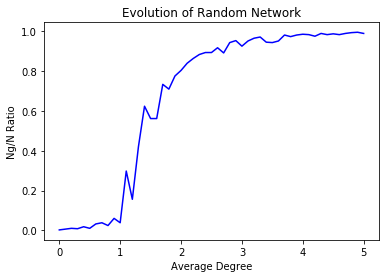

In [0]:
#Plotting graph between <k> and ratio Ng/N
plt.plot(b,a,'-b')

#X-axis label
plt.xlabel("Average Degree")
#Y-axis label
plt.ylabel("Ng/N Ratio")
#Plot title
plt.title("Evolution of Random Network")

**Subcritical Regime: 0 ‹ ‹k› ‹ 1**

Here in the subcritical regime the network consists of numerous tiny components. 

From the graph it is clear that the N<sub>G</sub>/N value is quite small

**Critical Point: ‹k› = 1**
Here, at the critical point most nodes are located in numerous small components.

As evident from the graph N<sub>G</sub>/N starts growing from k = 1, hence this is the critical point were the giant component starts to form

**Supercritical Regime: ‹k› › 1**

Here, the giant component starts to be evident. Numerous isolated components coexist with the giant component

As evident from the graph the N<sub>G</sub>/N value is growing at a rapid rate.

**Connected Regime: ‹k› › lnN**

Here, N = 500, therefore lnN = 6.21

In this regime, the giant component absorbs all nodes and components, hence NG ≃ N. In the absence of isolated nodes the network becomes connected.

As evident from the graph, N<sub>G</sub>/N value is quite stagnant in this regime as the graph almost takes up all the nodes to form the giant component

Hence this confirms with what we have studied from the barabasi book on random networks. Above graph follows the **evolution of random network** described in the book